In [2]:
#Importing Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#Import CSV
srsl_csv = "C:\\Users\\abrah\project_1\\Service_Requests_Street_Lights.csv"
srsl_df = pd.read_csv(srsl_csv, encoding="ISO-8859-1")

#Renaming column " ÈÀCreation Date" to "Creation Date" into the same varialbe
srsl_df = srsl_df.rename(columns={"ÈÀCreation Date":"Creation Date"})

# Adding new columns for Year, Month and Day using pd.DatetimeIndex.
# I noticed even with Pandas the csv took a while to load...
srsl_df['Year'] = pd.DatetimeIndex(srsl_df['Creation Date']).year
srsl_df['Month'] = pd.DatetimeIndex(srsl_df['Creation Date']).month
srsl_df['Day'] = pd.DatetimeIndex(srsl_df['Creation Date']).day

# Applying filter for year date range 2014 to 2018
srsl_df = srsl_df.loc[(srsl_df['Year']>2013) & (srsl_df['Year']<2019)]

In [4]:
# Filtering for the column that I will be usings
srsl_df = srsl_df[['Service Request Number', 'Type of Service Request', 'Street Address', 'ZIP Code', 'Community Area','Latitude', 'Longitude', 'Year', 'Month', 'Day']]

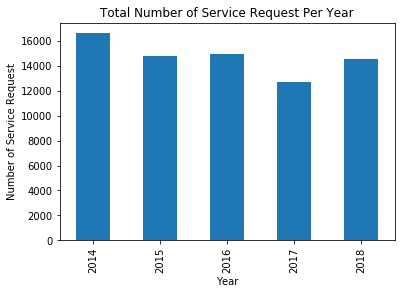

In [5]:
# Find the most service requests by year
most_by_year = srsl_df.groupby(["Year"])
most_by_year = most_by_year["Service Request Number"].count()
most_by_year = pd.DataFrame(most_by_year)
service_chart = most_by_year.plot(kind='bar', legend=0)
service_chart.set_ylabel("Number of Service Request")
service_chart.set_title("Total Number of Service Request Per Year")
plt.savefig("Total Number of Service Request Per Year")

In [6]:
most_by_year

,Service Request Number
Year,
2014,16587
2015,14756
2016,14918
2017,12729
2018,14552


In [10]:
# Using value_counts to solve for the address with the most Service Requests
# Finding the total of service requests by year
srsl_2014 = srsl_df.loc[(srsl_df['Year']==2014)]
srsl_gb_2014 = srsl_2014.groupby('Year')['Street Address'].value_counts()
srsl_gb_2014 = pd.DataFrame(srsl_gb_2014)
srsl_gb_2014 = srsl_gb_2014.rename(columns={'Street Address': 'Total'})
most_request_2014 = srsl_gb_2014.head(1)
most_request_2014

,,Total
Year,Street Address,
2014,12500 S PRINCETON AVE,13


In [11]:
srsl_2015 = srsl_df.loc[(srsl_df['Year']==2015)]
srsl_gb_2015 = srsl_2015.groupby('Year')['Street Address'].value_counts()
srsl_gb_2015 = pd.DataFrame(srsl_gb_2015)
srsl_gb_2015 = srsl_gb_2015.rename(columns={'Street Address': 'Total'})
most_request_2015 = srsl_gb_2015.head(1)
most_request_2015

,,Total
Year,Street Address,
2015,13500 S INDIANA AVE,9


In [12]:
srsl_2016 = srsl_df.loc[(srsl_df['Year']==2016)]
srsl_gb_2016 = srsl_2016.groupby('Year')['Street Address'].value_counts()
srsl_gb_2016 = pd.DataFrame(srsl_gb_2016)
srsl_gb_2016 = srsl_gb_2016.rename(columns={'Street Address': 'Total'})
most_request_2016 = srsl_gb_2016.head(1)
most_request_2016

,,Total
Year,Street Address,
2016,1000 N LAKE SHORE DR,6


In [13]:
srsl_2017 = srsl_df.loc[(srsl_df['Year']==2017)]
srsl_gb_2017 = srsl_2017.groupby('Year')['Street Address'].value_counts()
srsl_gb_2017 = pd.DataFrame(srsl_gb_2017)
srsl_gb_2017 = srsl_gb_2017.rename(columns={'Street Address': 'Total'})
most_request_2017 = srsl_gb_2017.head(1)
most_request_2017

,,Total
Year,Street Address,
2017,3200 W AUGUSTA BLVD,7


In [14]:
srsl_2018 = srsl_df.loc[(srsl_df['Year']==2018)]
srsl_gb_2018 = srsl_2018.groupby('Year')['Street Address'].value_counts()
srsl_gb_2018 = pd.DataFrame(srsl_gb_2018)
srsl_gb_2018 = srsl_gb_2018.rename(columns={'Street Address': 'Total'})
most_request_2018 = srsl_gb_2018.head(1)
most_request_2018 

,,Total
Year,Street Address,
2018,3547 N ALBANY AVE,9


In [15]:
most_request_append = most_request_2014.append([most_request_2015, most_request_2016, most_request_2017, most_request_2018])
most_request_append

,,Total
Year,Street Address,
2014,12500 S PRINCETON AVE,13
2015,13500 S INDIANA AVE,9
2016,1000 N LAKE SHORE DR,6
2017,3200 W AUGUSTA BLVD,7
2018,3547 N ALBANY AVE,9


In [ ]:
most_request_pt = most_request_append.pivot_table(index='Year', columns='Street Address', values='Total')
most_request_pt

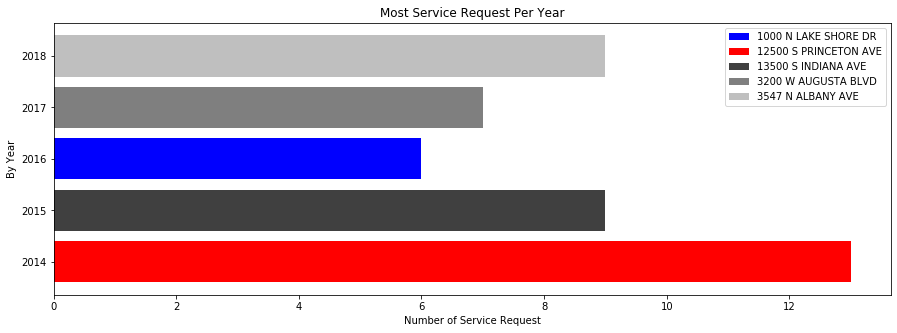

In [155]:
x_axis = np.arange(len(most_request_pt))
plt.barh(x_axis, most_request_pt['1000 N LAKE SHORE DR'], color='blue', label="1000 N LAKE SHORE DR", align="center")
plt.barh(x_axis, most_request_pt['12500 S PRINCETON AVE'], color='red', label="12500 S PRINCETON AVE",align="center")
plt.barh(x_axis, most_request_pt['13500 S INDIANA AVE'], color='black', label='13500 S INDIANA AVE', alpha=0.75, align="center")
plt.barh(x_axis, most_request_pt['3200 W AUGUSTA BLVD'], color='black', label='3200 W AUGUSTA BLVD', alpha=0.5, align="center")
plt.barh(x_axis, most_request_pt['3547 N ALBANY AVE'], color='black', label='3547 N ALBANY AVE', alpha=0.25, align="center")
tick_locations = [value for value in x_axis]
plt.gcf().set_size_inches(15, 5)
plt.yticks(tick_locations, [2014, 2015, 2016, 2017, 2018])
plt.legend(loc="best")
plt.title("Most Service Request Per Year")
plt.ylabel("By Year")
plt.xlabel("Number of Service Request")
plt.savefig("Most Service Request Per Year")

In [9]:
most_request_append

NameError: name 'most_request_append' is not defined